# Analisis Performa Algoritma Sorting: Uji Waktu Eksekusi pada Data Acak, Terurut, dan Terbalik

**Deskripsi**: Dalam artikel ini, kami melakukan pengujian terhadap beberapa algoritma sorting, yaitu **Bubble Sort**, **Selection Sort**, **Merge Sort**, **Quick Sort**, **Heap Sort**, dan **Tim Sort**, untuk menganalisis waktu eksekusi mereka pada dua ukuran dataset, yaitu **1000** dan **10000** elemen. Ketiga jenis dataset yang diuji meliputi data acak, data terurut, dan data terbalik. Hasil pengujian ini diharapkan dapat membantu pembaca memahami kinerja masing-masing algoritma dalam situasi yang berbeda dan memberikan wawasan tentang pengaruh ukuran data terhadap efisiensi algoritma sorting.

In [27]:
import time
import random
import matplotlib.pyplot as plt
import pandas as pd

# Fungsi untuk membuat dataset pengujian
def create_datasets(sizes):
    datasets = {}
    for size in sizes:
        data_acak = [random.randint(0, 10000) for _ in range(size)]  # Data acak
        data_terurut = sorted(data_acak)  # Data yang sudah terurut
        data_terbalik = sorted(data_acak, reverse=True)  # Data terurut terbalik
        datasets[size] = {
            "Data Acak": data_acak,
            "Data Terurut": data_terurut,
            "Data Terbalik": data_terbalik
        }
    return datasets

# Implementasi algoritma sorting
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

def heap_sort(arr):
    def heapify(arr, n, i):
        largest = i
        l = 2 * i + 1
        r = 2 * i + 2

        if l < n and arr[i] < arr[l]:
            largest = l

        if r < n and arr[largest] < arr[r]:
            largest = r

        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]
            heapify(arr, n, largest)

    n = len(arr)
    for i in range(n//2 - 1, -1, -1):
        heapify(arr, n, i)

    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

# Mengukur waktu eksekusi untuk setiap algoritma
def measure_time(algorithm, data):
    start_time = time.time()
    algorithm(data)
    end_time = time.time()
    return end_time - start_time

# Daftar algoritma untuk diuji
algorithms = {
    "Bubble Sort": bubble_sort,
    "Selection Sort": selection_sort,
    "Merge Sort": merge_sort,
    "Quick Sort": quick_sort,
    "Heap Sort": heap_sort,
    "Tim Sort": sorted  # Fungsi sorted() bawaan Python menggunakan Tim Sort
}


In [28]:
# Ukuran data yang akan diuji
data_sizes = [1000, 10000]
datasets = create_datasets(data_sizes)

In [29]:
# Menyimpan hasil pengujian
results = {}

for size, dataset in datasets.items():
    results[size] = {}
    for name, algorithm in algorithms.items():
        results[size][name] = {
            "Data Acak": measure_time(algorithm, dataset["Data Acak"].copy()),
            "Data Terurut": measure_time(algorithm, dataset["Data Terurut"].copy()),
            "Data Terbalik": measure_time(algorithm, dataset["Data Terbalik"].copy())
        }

In [36]:
# Menampilkan hasil dalam bentuk DataFrame
df = pd.DataFrame({(f'Data {i}', j): results[i][j] for i in results.keys() for j in results[i]})
df

Data 1000                                                 \
              Bubble Sort Selection Sort Merge Sort Quick Sort Heap Sort   
Data Acak        0.093940       0.042082   0.003616   0.002617  0.004732   
Data Terurut     0.051936       0.041850   0.002788   0.001736  0.004970   
Data Terbalik    0.121826       0.043255   0.002789   0.001729  0.004283   

                         Data 10000                                       \
               Tim Sort Bubble Sort Selection Sort Merge Sort Quick Sort   
Data Acak      0.000130   11.229515       5.646216   0.086389   0.052593   
Data Terurut   0.000010    5.966639       4.296177   0.069716   0.039889   
Data Terbalik  0.000037   14.699210       5.556836   0.071957   0.040261   

                                   
              Heap Sort  Tim Sort  
Data Acak      0.136468  0.002331  
Data Terurut   0.143203  0.000173  
Data Terbalik  0.116607  0.000763

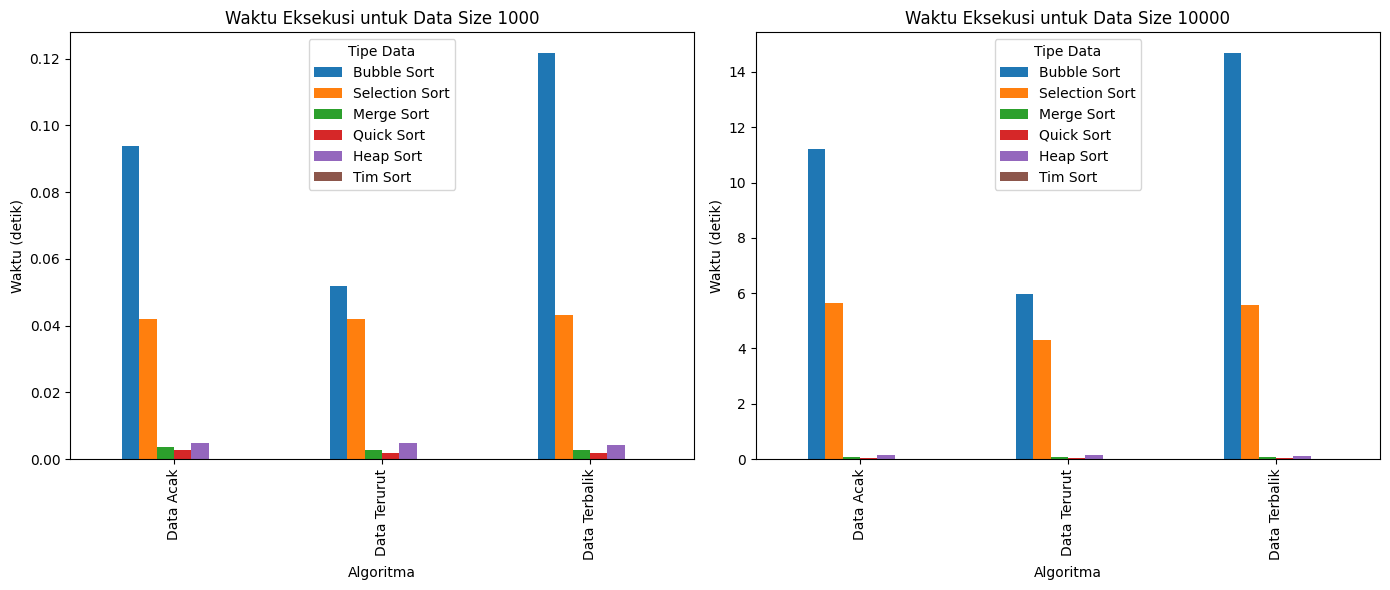

In [37]:
# Visualisasi hasil
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
for ax, size in zip(axes, data_sizes):
    df[f'Data {size}'].plot(kind='bar', ax=ax)
    ax.set_title(f'Waktu Eksekusi untuk Data Size {size}')
    ax.set_ylabel('Waktu (detik)')
    ax.set_xlabel('Algoritma')
    ax.legend(title='Tipe Data')

plt.tight_layout()
plt.show()